# Sprint 4
### Mekala Bhargav
### N Pavan
### Munjuru Bharadwaja
### Nariboyina Pavan Sai

In [4]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [5]:
import keras 
from keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [7]:
x_train=train_datagen.flow_from_directory(r'C:\Users\green\Downloads\Dataset\Dataset\train_set',target_size=(128,128),batch_size=32,class_mode='binary')
x_test=test_datagen.flow_from_directory(r'C:\Users\green\Downloads\Dataset\Dataset\test_set',target_size=(128,128),batch_size=32,class_mode='binary')

Found 436 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


In [8]:
train=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 rotation_range=180,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [9]:
x_train.class_indices

{'forest': 0, 'with fire': 1}

In [10]:
from keras.models import Sequential
#to add layer import Dense
from keras.layers import Dense
#to create convolution kernel import convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

In [11]:
model = keras.Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

In [12]:
model.add(Dense(150,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [13]:
model.compile(loss = 'binary_crossentropy',
              optimizer = "adam",
              metrics = ["accuracy"])

In [14]:
r = model.fit(x_train, epochs = 5, validation_data = x_train)

Epoch 1/5
14/14 [==============================] - 106s 7s/step - loss: 0.5695 - accuracy: 0.6858 - val_loss: 0.5249 - val_accuracy: 0.7454
Epoch 2/5
14/14 [==============================] - 53s 4s/step - loss: 0.3779 - accuracy: 0.8326 - val_loss: 0.2945 - val_accuracy: 0.8601
Epoch 3/5
14/14 [==============================] - 50s 4s/step - loss: 0.2522 - accuracy: 0.8945 - val_loss: 0.5275 - val_accuracy: 0.8050
Epoch 4/5
14/14 [==============================] - 59s 4s/step - loss: 0.2730 - accuracy: 0.8945 - val_loss: 0.2010 - val_accuracy: 0.9220
Epoch 5/5
14/14 [==============================] - 48s 4s/step - loss: 0.2016 - accuracy: 0.9151 - val_loss: 0.1473 - val_accuracy: 0.9450


In [15]:
predictions = model.predict(x_train)
predictions = np.round(predictions)

14/14 [==============================] - 25s 2s/step


In [16]:
predictions

array([[0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],

In [17]:
print(len(predictions))

436


In [18]:
#import load_model from keras.model
from keras.models import load_model
#import image class from keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image
#import numpy
import numpy as np
#import cv2
import cv2

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

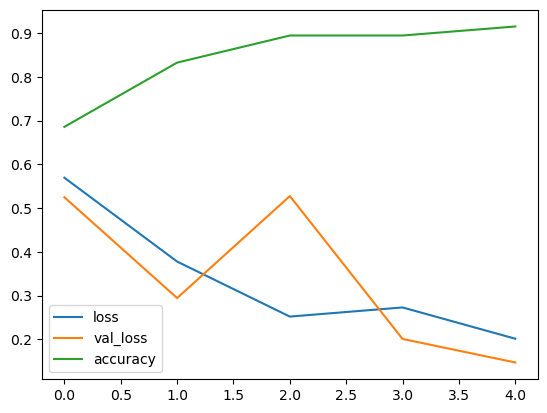

In [22]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.plot(r.history['accuracy'], label='accuracy')
plt.legend()

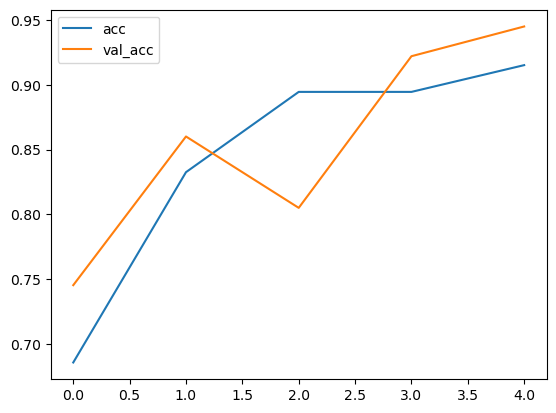

In [23]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

## Code for finding whether fire is found or not

In [43]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(128,128))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("No Fire",fontsize=30)

## Checking for perfection

1/1 [==============================] - 0s 50ms/step
[[0.]]


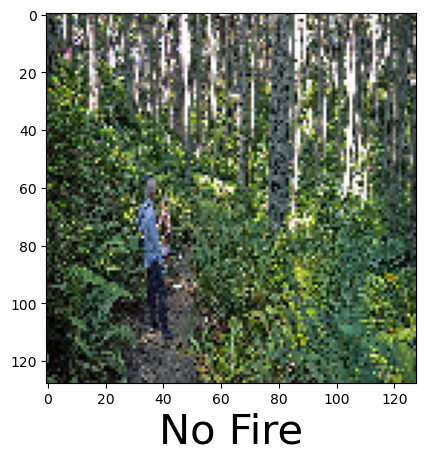

In [46]:
predictImage(r"C:\Users\green\Downloads\Dataset\Dataset\train_set\forest\with_fire (105).jpg")

1/1 [==============================] - 0s 63ms/step
[[1.]]


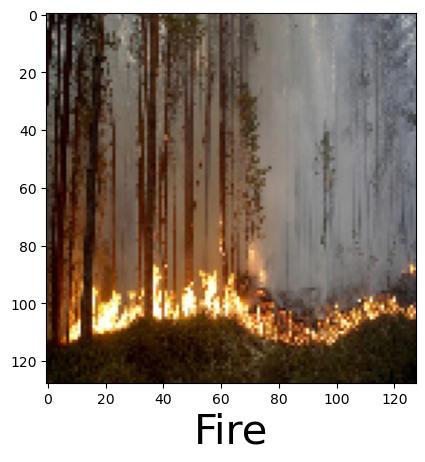

In [50]:
predictImage(r"C:\Users\green\Downloads\Dataset\Dataset\train_set\with fire\with fire (94).jpg")

1/1 [==============================] - 0s 287ms/step
[[1.]]


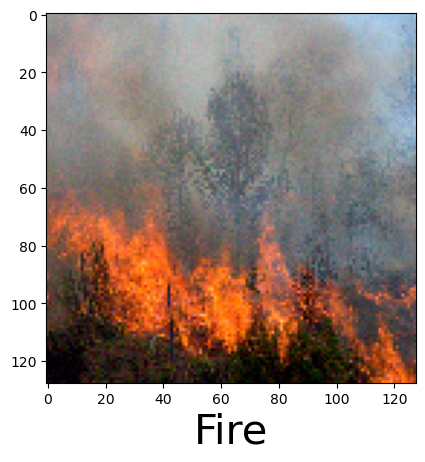

In [51]:
predictImage(r"C:\Users\green\Downloads\Dataset\Dataset\train_set\with fire\with fire.jpeg")